In [93]:
# Importing Libraries for data handling
import numpy as np
import pandas as pd

# Importing Libraries for Visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Libraries for Preprocesing dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Importing Libraries for Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importing Libraries for Model performance
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report
from sklearn.metrics import average_precision_score,recall_score

# Importing Libraries to boost Model performance
from sklearn.model_selection import GridSearchCV

The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promotion" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "evaluation" - the composite score the employee received in their last evaluation.
- "number_of_projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "time_spend_company" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "average_montly_hours" - the average hours the employee worked in a month.
- "churn" - "yes" if the employee ended up leaving, "no" otherwise.

In [94]:
#Load and view dataset
df = pd.read_csv('C:/Users/emeka/DATASETS/turnover.csv')
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [95]:
#investigate the dataframe to find details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [96]:
df.describe()


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [97]:
df.nunique()

satisfaction             92
evaluation               65
number_of_projects        6
average_montly_hours    215
time_spend_company        8
work_accident             2
churn                     2
promotion                 2
department               10
salary                    3
dtype: int64

Text(0.5, 1.0, 'Percentage of employee churn')

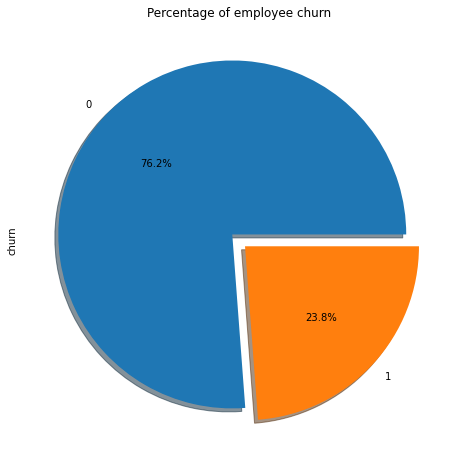

In [98]:
#Get percentage of employee churn
df['churn'].value_counts().plot.pie(explode= [0.05, 0.05], autopct = '%1.1f%%', shadow=True, figsize=(10,8))
plt.title('Percentage of employee churn')

Note: This is an Imbalanced dataset. 23.8% of employees churned.when we begin analysis, we would need to perform sampling to balance the dataset.

# Analysing categorical variables

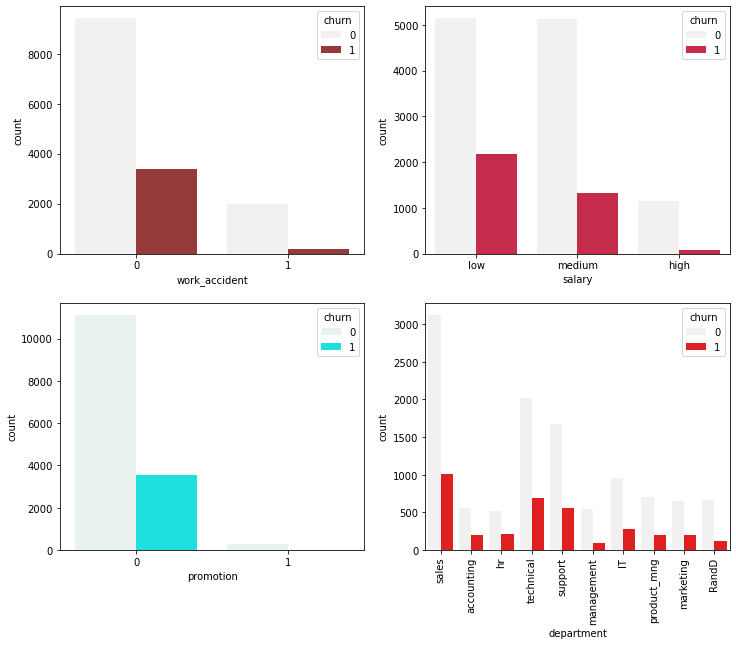

In [99]:
cat_var = ['work_accident','salary','promotion', 'department']
fig, ax = plt.subplots(nrows =2, ncols= 2, figsize = (12,10))

sns.countplot(x = 'work_accident', hue = 'churn', data =df, color ='brown', ax = ax[0,0])
sns.countplot(x = 'salary', hue = 'churn', data =df, color ='crimson', ax = ax[0,1])
sns.countplot(x = 'promotion', hue = 'churn', data =df, color ='aqua', ax = ax[1,0])
sns.countplot(x = 'department', hue = 'churn', data =df, color ='red', ax = ax[1,1])
plt.xticks(rotation=90) # rotates x label so there is enough space
plt.show()

As expected, employees with low salary, medium salary and no promotion had a greater churn percentage. This makes sense because employees will always move to competitors that aren willing to increase their salaries. Further details on the reason for churn will be required to draw a conclusion on this.


However, we are going to analyze the relationship between salary and years with the company, promotion and salary. 

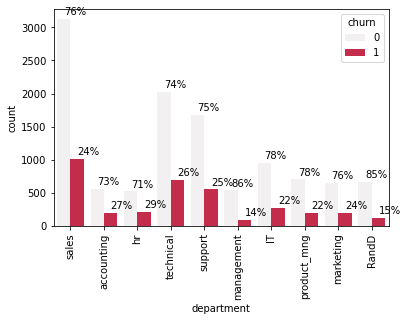

In [100]:
ax = sns.countplot(x='department', hue='churn', data = df, color='crimson')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax.text(left.get_x() + left.get_width()/2, left.get_height()+60, '{0:.0%}'.format(height_l/total))
    ax.text(right.get_x() + right.get_width()/2, right.get_height()+60, '{0:.0%}'.format(height_r/total))
    plt.xticks(rotation=90) # rotates x label so there is enough space

staff in hr, accounting, technical, support, sales, marketing, It and product_mgt are more likely to churn

from the analysis it can be seen that the company experiences high churn from the 3rd year and by the 5th year, it would have the greatest employee churn at 57% and from the 7th year, no employee churn.

In [101]:
churn_num_years = df.groupby('time_spend_company')['churn'].value_counts()
churn_num_years

time_spend_company  churn
2                   0        3191
                    1          53
3                   0        4857
                    1        1586
4                   0        1667
                    1         890
5                   1         833
                    0         640
6                   0         509
                    1         209
7                   0         188
8                   0         162
10                  0         214
Name: churn, dtype: int64

In [102]:
#convert churn by years to percentage
churn_num_years_pcts = churn_num_years.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
churn_num_years_pcts

time_spend_company  churn
2                   0         98.366215
                    1          1.633785
3                   0         75.384138
                    1         24.615862
4                   0         65.193586
                    1         34.806414
5                   1         56.551256
                    0         43.448744
6                   0         70.891365
                    1         29.108635
7                   0        100.000000
8                   0        100.000000
10                  0        100.000000
Name: churn, dtype: float64

# Analyzing Numerical Variables

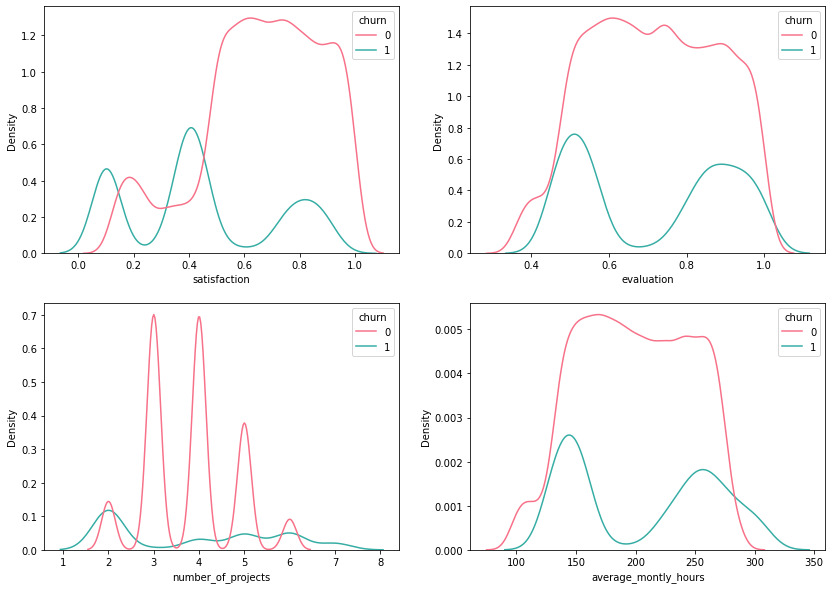

In [103]:
# create fig object and subplot number
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# plot distributuion of satisfaction, evaluation, number_of_projects, average_montly_hours 
sns.kdeplot(x='satisfaction', hue='churn', data=df, palette ="husl", ax=ax[0,0])
sns.kdeplot(x='evaluation', hue='churn', data=df, palette ="husl", ax=ax[0,1])
sns.kdeplot(x='number_of_projects', hue='churn', data=df, palette ="husl", ax=ax[1,0])
sns.kdeplot(x='average_montly_hours', hue='churn', data=df, palette ="husl", ax=ax[1,1])

plt.show() # removes matplot default plot label

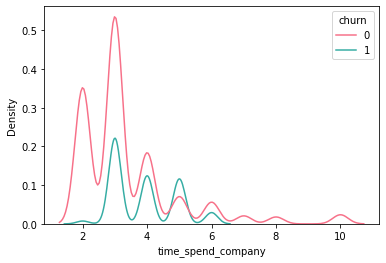

In [104]:
sns.kdeplot(x='time_spend_company', hue='churn', data=df, palette ="husl")

plt.show()

employess with satisfaction of low satisfaction are more likely to churn. Also the less the number of years an employee spends, the more likely he/she is to churn. This also related to the number of projects the employee would have been involved in before churning.
employees working more than 150 hours monthly are more likely to churn.
Another feature that would have helped in determing churn would have been the contract type of the employee. as contract staff are more likely to churn.

# Dealing with Outliers

from our initial descriptive analysis, we noticed some outliers so we are going to examine this

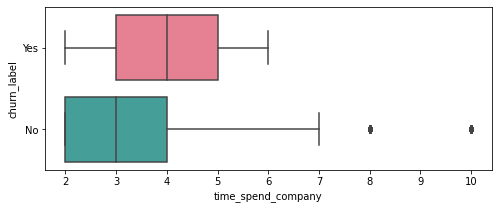

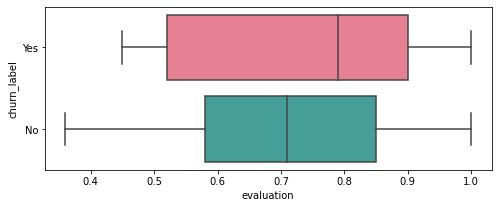

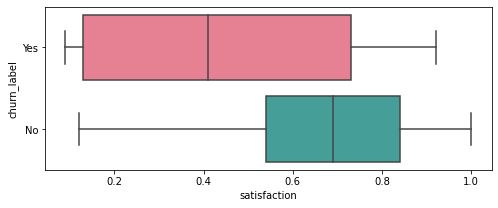

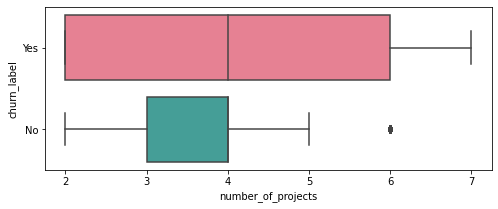

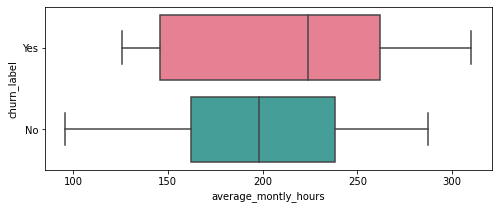

In [105]:
num_var = ['time_spend_company','evaluation', 'satisfaction', 'number_of_projects', 'average_montly_hours']
df['churn_label']= df['churn'].replace({0:'No',1:  'Yes'})
for col in num_var:
    fig = plt.figure(figsize=(8,3)) #set plot size
    sns.boxplot(data =df, x= col, y= 'churn_label', palette ='husl')

In checking for outliers, we noticed there are bot outliers for employere churn so we are going to check for collinearity in numerical variables.

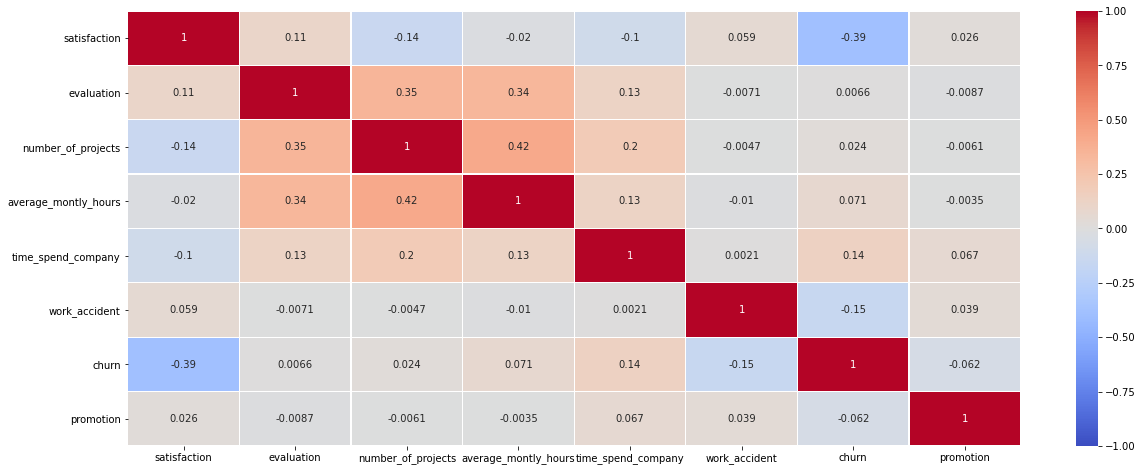

In [106]:
plt.figure(figsize=(20,8))
cor = df.corr()
sns.heatmap(cor, annot=True,linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [107]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [108]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

0

as can be seen, none of the features are highly correlated with one another.So they will all be used in our model

I would also like to see how my categorical features relate to each other and how strong the correlation between them is. But since this features contain string values for most of the columns, I would have to pre-process them before I can analyse them together.

In [109]:
# one hot encoding on dataset
dummy_df = pd.get_dummies(df, columns=cat_var)
dummy_df.drop('churn_label', axis = 1).head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,churn,work_accident_0,work_accident_1,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

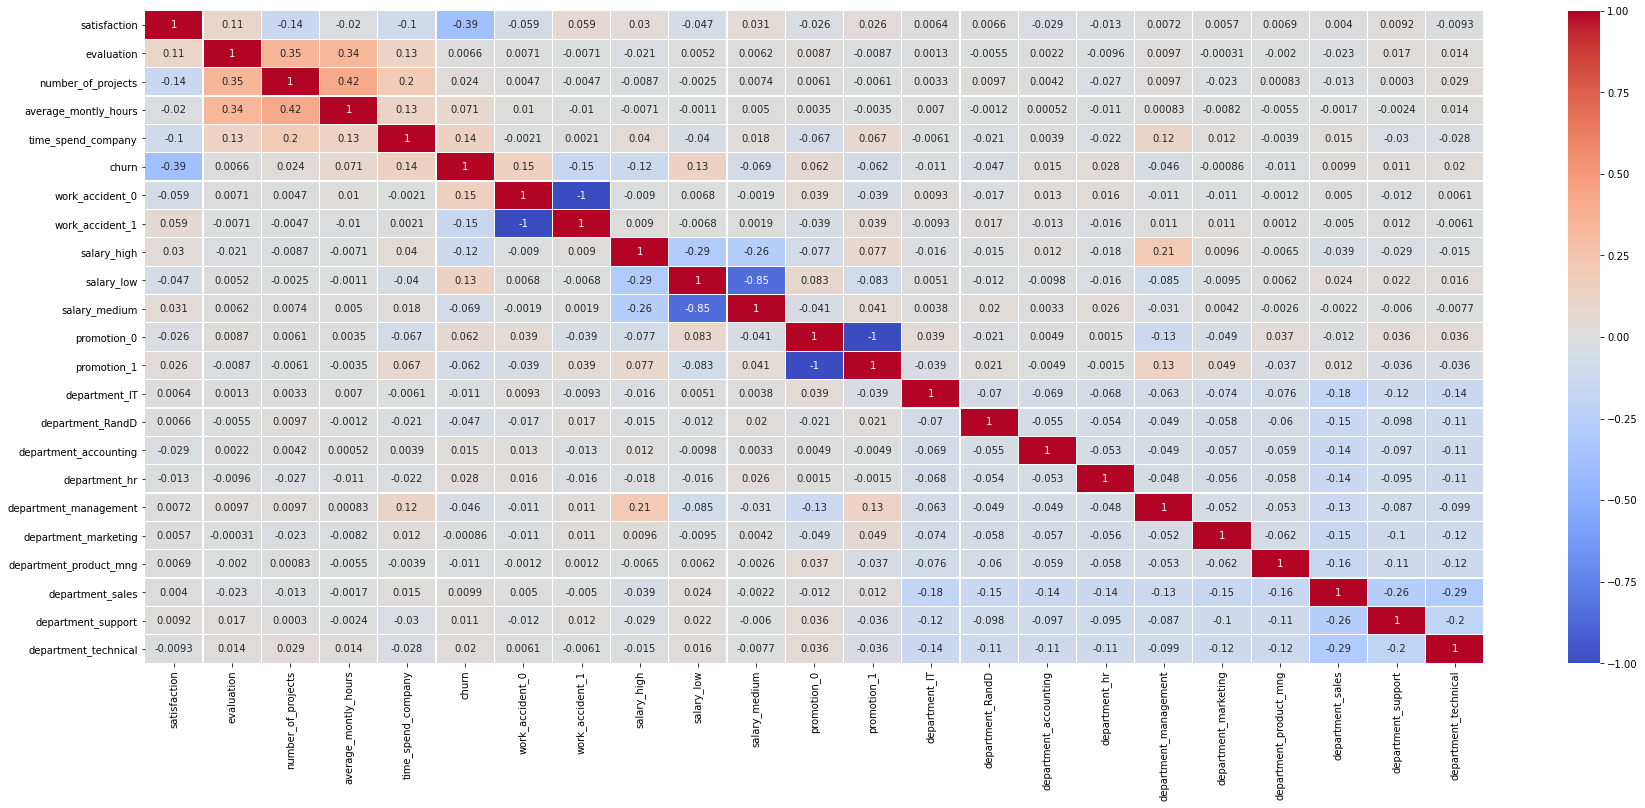

In [110]:
#Check for coliearity in categorical variable
# set plot size
plt.figure(figsize=(30, 12))

#create correlation data frame
corr = dummy_df.corr()

# plot heat map of correlation data frame
sns.heatmap(corr, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [111]:
corr_features = correlation(dummy_df, 0.7)
len(set(corr_features))

3

In [112]:
corr_features

{'promotion_1', 'salary_medium', 'work_accident_1'}

# Feature Selection

From this point I would split my dataset into 2 groups:

- To account for collinearity
- To ignore multicollinearity and use all features

In [113]:
# Accounting for collinearity and dropping correlated features
#dummy_df = dummy_df.drop(['churn_label'], axis = 1)
#dummy_df = dummy_df.drop(corr_features, axis = 1)
dummy_df.columns.values

array(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'churn',
       'churn_label', 'work_accident_0', 'work_accident_1', 'salary_high',
       'salary_low', 'salary_medium', 'promotion_0', 'promotion_1',
       'department_IT', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'], dtype=object)

In [114]:
X = dummy_df.drop(['churn','churn_label'], axis =1)
y = dummy_df['churn']

#load and split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((11999, 22), (3000, 22))

In [115]:
#From the EDA, It was clear that the data set was imbalanced, hence I would do oversampling to balance it
# Oversampling but train and test data set
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)

In [116]:
# check that oversampling was successful using value count on dependent variable
y_train.value_counts()

0    9134
1    9134
Name: churn, dtype: int64

In [117]:
#ignoring multi collinearity and using all the features 
dummy_df2 = pd.get_dummies(df, columns=cat_var)
dummy_df2 = dummy_df2.drop('churn_label', axis = 1)
dummy_df2.columns.values

array(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'churn',
       'work_accident_0', 'work_accident_1', 'salary_high', 'salary_low',
       'salary_medium', 'promotion_0', 'promotion_1', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'], dtype=object)

In [118]:
X2 = dummy_df2.drop('churn', axis =1)
y2 = dummy_df2['churn']

#load and split the dataset into train and test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)
X2_train.shape, X2_test.shape

((11999, 22), (3000, 22))

In [119]:
# Oversampling but train and test data set
X2_train, y2_train = SMOTE().fit_resample(X2_train, y2_train)
X2_test, y2_test = SMOTE().fit_resample(X2_test, y2_test)

In [120]:
dummy_df2.columns.values

array(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'churn',
       'work_accident_0', 'work_accident_1', 'salary_high', 'salary_low',
       'salary_medium', 'promotion_0', 'promotion_1', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'], dtype=object)

# Feature Scaling

In [121]:
# creating scaler object
scaler = MinMaxScaler()

In [122]:
#Group 1: To account for collinearity
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
#Group 2: To ignore multicollinearity and use all features
X2_train = scaler.fit_transform(X2_train) 
X2_test =scaler.transform(X2_test)

# Model Building

In this section, I would train and test several models but let's begin the simplest classifier (Logistic Regression Classifier) and test it on each of our feature selection. After this, I would try other model such as Random Forest classifier, Desion tree classifier, SVG and KNN.

Before I proceed, let me do a baseline model to get an idea of what score to expect

# Baseline Model 
For this, we would use the original imbalance dataset

- precision = tp/(tp+fp)
- recall = tp/(tp+fn)
- fi_score = 2(precision)(recall)/(precision+recall)


In [148]:
LR = LogisticRegression()
#train the model on train set
LR.fit(X_train, y_train)

C:\Users\emeka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
#predict
y_pred = LR.predict(X_test)

In [168]:
LR_acc = accuracy_score(y_test, y_pred)
print(LR_acc)
LR_conf_mat = classification_report(y_test, y_pred)
print(LR_conf_mat)
LR_f1 = f1_score(y_test, y_pred)
LR_f1
LR_cmatrix = confusion_matrix(y_test, y_pred)
print(LR_cmatrix)

0.9531386224934612
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2294
           1       0.94      0.96      0.95      2294

    accuracy                           0.95      4588
   macro avg       0.95      0.95      0.95      4588
weighted avg       0.95      0.95      0.95      4588

[[2164  130]
 [  85 2209]]


In [157]:
LR2 = LogisticRegression()
LR2.fit(X2_train, y2_train)
#predict
y_pred = LR2.predict(X2_test)

LR2_acc = accuracy_score(y2_test, y_pred)
print(LR2_acc)
LR2_conf_mat = classification_report(y2_test, y_pred)
print(LR2_conf_mat)
LR2_cmatrix = confusion_matrix(y2_test, y_pred)
print(LR2_cmatrix)

0.8360941586748039
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2294
           1       0.82      0.87      0.84      2294

    accuracy                           0.84      4588
   macro avg       0.84      0.84      0.84      4588
weighted avg       0.84      0.84      0.84      4588

[[1846  448]
 [ 304 1990]]


In [158]:
#store f1 score in col_f1 and call
LR2_f1 = f1_score(y_test, y_pred)
LR2_f1

0.8410819949281487

In [159]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
#predict
y_pred = RFC.predict(X_test)

RFC_acc = accuracy_score(y_test, y_pred)
print(RFC_acc)
RFC_conf_mat = classification_report(y_test, y_pred)
print(RFC_conf_mat)
RFC_cmatrix = confusion_matrix(y2_test, y_pred)
print(RFC_cmatrix)

0.9753705318221447
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2294
           1       0.99      0.96      0.97      2294

    accuracy                           0.98      4588
   macro avg       0.98      0.98      0.98      4588
weighted avg       0.98      0.98      0.98      4588

[[2279   15]
 [  98 2196]]


In [129]:
rf_f1 = f1_score(y_test, y_pred)
rf_f1

0.9724199288256229

From the above, ignoring multi collinearity results in a slightly better performing model

In [160]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
#predict
y_pred = DTC.predict(X_test)

DTC_acc = accuracy_score(y_test, y_pred)
print(DTC_acc)
DTC_conf_mat = classification_report(y_test, y_pred)
print(DTC_conf_mat)
DTC_cmatrix = confusion_matrix(y2_test, y_pred)
print(DTC_cmatrix)

0.95640802092415
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2294
           1       0.96      0.95      0.96      2294

    accuracy                           0.96      4588
   macro avg       0.96      0.96      0.96      4588
weighted avg       0.96      0.96      0.96      4588

[[2208   86]
 [ 114 2180]]


In [161]:
DTC_f1 = f1_score(y2_test, y_pred)
DTC_f1

0.9561403508771931

In [162]:
svc = SVC()
svc.fit(X_train, y_train)
#predict
y_pred = svc.predict(X_test)

svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)
svc_conf_mat = classification_report(y_test, y_pred)
print(svc_conf_mat)
svc_cmatrix = confusion_matrix(y2_test, y_pred)
print(svc_cmatrix)

0.9452920662598082
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2294
           1       0.94      0.95      0.95      2294

    accuracy                           0.95      4588
   macro avg       0.95      0.95      0.95      4588
weighted avg       0.95      0.95      0.95      4588

[[2166  128]
 [ 123 2171]]


In [164]:
svc_f1 = f1_score(y_test, y_pred)
svc_f1

0.9453516220335293

In [165]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
#predict
y_pred = KNC.predict(X_test)

KNC_acc = accuracy_score(y_test, y_pred)
print(KNC_acc)
KNC_conf_mat = classification_report(y_test, y_pred)
print(KNC_conf_mat)
KNC_cmatrix = confusion_matrix(y2_test, y_pred)
print(KNC_cmatrix)

0.9531386224934612
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2294
           1       0.94      0.96      0.95      2294

    accuracy                           0.95      4588
   macro avg       0.95      0.95      0.95      4588
weighted avg       0.95      0.95      0.95      4588

[[2164  130]
 [  85 2209]]


In [166]:
KNC_f1 = f1_score(y_test, y_pred)
KNC_f1

0.9535937837254479

# Model Performance

I am going to analyze the performance of these models using the following evaluation metrics
 - Accuracy
 - F1_score
 - Confusion metrics

Explaining the metrics
- F1 score: The harmonic mean of the model's precision and recall and this is my main basis for evaluation
- Accuracy score: the ratio of correct predictions to total number of observation
- Confusion matrix: matrix of True positive, False positive, True Negative and False Negative
- Recall vs Precision: In this problem, we are more interested on predicting the employees who may churn. For us a False Negative is more dangerous than a False Positive and hence in case of tough competition in terms of other metrics we may choose a model with higher recall at the cost of precision.


In [170]:
#collate all f_1 score into a pandas series before plotting
model_f1 = pd.Series(data = [LR_f1, rf_f1,DTC_f1, svc_f1, KNC_f1],
                     index = ['Logistic Regression', 'Random Forest', 'Decission Tree', 'SVC', 'K Neighrest Neighbor'])
model_f1

Logistic Regression     0.953594
Random Forest           0.972420
Decission Tree          0.956140
SVC                     0.945352
K Neighrest Neighbor    0.953594
dtype: float64

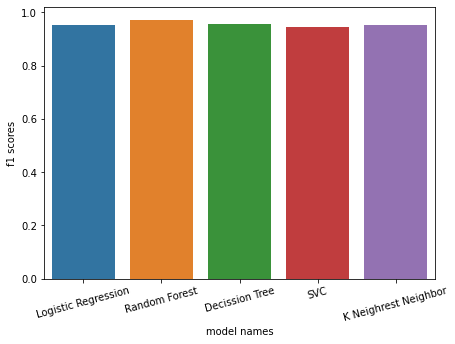

In [171]:
fig, ax = plt.subplots(figsize =(7,5))
sns.barplot(x = model_f1.index, y = model_f1, ax =ax)
plt.xlabel('model names') #add ylabel
plt.ylabel('f1 scores') # add xlabel
plt.xticks(rotation=15) #rotate xlabels to fit
plt.show()

In [172]:
#collate all accuracy score into a pandas series before plotting
model_acc = pd.Series(data = [LR_acc, RFC_acc,DTC_acc, svc_acc, KNC_acc],
                     index = ['Logistic Regression', 'Random Forest', 'Decission Tree', 'SVC', 'K Neighrest Neighbor'])
model_acc

Logistic Regression     0.953139
Random Forest           0.975371
Decission Tree          0.956408
SVC                     0.945292
K Neighrest Neighbor    0.953139
dtype: float64

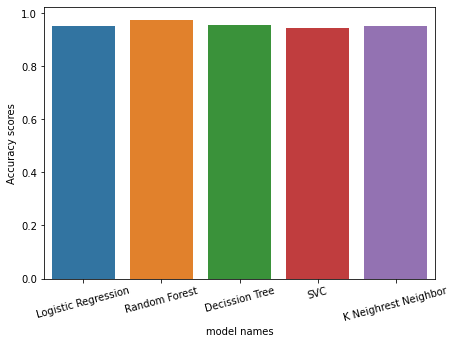

In [173]:
fig, ax = plt.subplots(figsize =(7,5))
sns.barplot(x = model_acc.index, y = model_acc, ax =ax)
plt.xlabel('model names') #add ylabel
plt.ylabel('Accuracy scores') # add xlabel
plt.xticks(rotation=15) #rotate xlabels to fit
plt.show()

In [169]:
#Print the confusion matrix for all models for easy comparison
print('Logistic Regression model confusion matrix')
print(LR_cmatrix)
print('\n')
print('Random Forest model confusion matrix')
print(RFC_cmatrix)
print('\n')
print('Decision Tree  model confusion matrix')
print(DTC_cmatrix)
print('\n')
print('Support Vector Classifier model confusion matrix')
print(svc_cmatrix)
print('\n')
print('K-nearest neighbor model confusion matrix')
print(KNC_cmatrix)

Logistic Regression model confusion matrix
[[2164  130]
 [  85 2209]]


Random Forest model confusion matrix
[[2279   15]
 [  98 2196]]


Decision Tree  model confusion matrix
[[2208   86]
 [ 114 2180]]


Support Vector Classifier model confusion matrix
[[2166  128]
 [ 123 2171]]


K-nearest neighbor model confusion matrix
[[2164  130]
 [  85 2209]]


Random Forest is the model with the best f1 and accuracuracy scores. 

# Hyper parameter tuning with GridsearchCV


In [174]:
# declaring an object for the classifier
RFC = RandomForestClassifier()

# set hyper parameters

param_grid = {'n_estimators': [100, 600],
             'min_samples_split': [3],
             'random_state': [7,10],
             'random_state': [5,42]}

In [175]:
# grid search estimator
grid = GridSearchCV(RFC, param_grid=param_grid,
                   cv=5, scoring='f1',
                   return_train_score=True)

In [176]:
#train grid
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [3], 'n_estimators': [100, 600],
                         'random_state': [5, 42]},
             return_train_score=True, scoring='f1')

In [177]:
#best parameters
print(grid.best_params_)

{'min_samples_split': 3, 'n_estimators': 600, 'random_state': 42}


In [178]:
# get best score
grid.best_score_

0.9840051306586872

In [179]:
# get best hyper parameter estimator
grid.best_estimator_

RandomForestClassifier(min_samples_split=3, n_estimators=600, random_state=42)

The hyper-parameter tuning didnt improve the score too much, but to the fair the score pretty high already

# Key Insights

- Almost 24% of staff have churned leading to skill and knowledge gaps across all departments,
- It can be seen that the company experiences high churn from the 3rd year and by the 5th year, it would have the greatest employee churn at 57%, representing invaluable skills that take time to retrain
- Important features that describe staff who left are their lack of promotions or a bonus, higher than company average performance reviews (0.72), and a tendency to work longer,
- The higher performance review ratings are often coupled with lower satisfaction rates, particularly for those who left,
- This suggests employees who left experience a higher risk of burnout, with few to no benefits,
- These findings are consistent across departments, as employees may not be getting the recognition reflected in tangible outcomes, such as promotions, bonuses or career progressions.


# Recommendations
- Armed with this knowledge, the company can (and should) do more to intervene and reduce turn-over levels to below 20% across departments. This could be done via:

- Increasing the percentage of promotions given to staff proportionately across departments,
- Increasing the number of bonuses issues as way of review performance recognition,
- Introduce other benefits that shows recognition for hard work, such as extra days off or paid development opportunities.
- Targeted interventions for employees who have only been at the company for a limited amount of time.